# BUSINESS PROBLEM UNDERSTANDING

Dream Housing Finance Company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas.Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process based on customer detail provided while filiming online application form. these details are Gender , Marital Status, Education, Number of Dependents, Income, loan amount, Credit History and others.to automate this process ,they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\Pinky\Downloads\LoanData (1).csv")
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


# Data understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.drop(columns=["Loan_ID"],inplace = True)

In [9]:
df.shape

(614, 12)

In [10]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df["Gender"].nunique()

2

In [12]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df['ApplicantIncome'].nunique()

505

In [17]:
df['LoanAmount'].nunique()

203

In [18]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [20]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [22]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [23]:
df["Credit_History"] = df["Credit_History"].replace({1:"good",0:"bad"})

In [24]:
df["Credit_History"].unique()

array(['good', 'bad', nan], dtype=object)

In [25]:
continous=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
discreate_categorical=["Gender","Married","Education","Self_Employed","Credit_History",
                       "Property_Area","Load_Status"]
discreate_count=["Dependents","Loan_Amount_Term"]

In [26]:
df[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [27]:
df[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

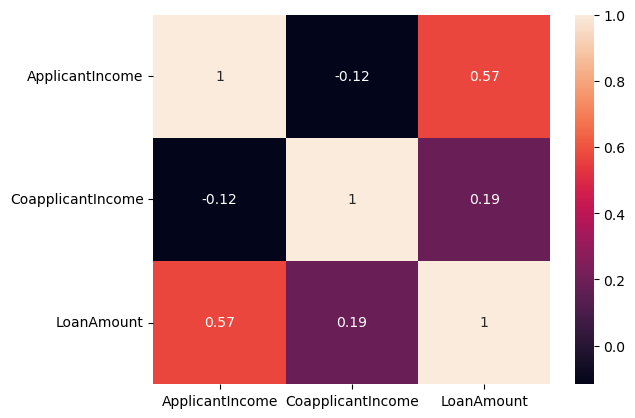

In [28]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

# Data preprocessing


In [30]:
df["Income"]=df["ApplicantIncome"] + df["CoapplicantIncome"]

In [31]:
df.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [32]:
df["Dependents"] = df["Dependents"].replace({"3+":3})

In [33]:
df["Dependents"].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [34]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [37]:
df["Dependents"] = df["Dependents"].fillna(0)

In [38]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [39]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [40]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


In [41]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
LoanAmount           0
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [42]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


In [43]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [44]:
df["Gender"] = df["Gender"].replace({"Male":1,"Female":0})
df["Married"] = df["Married"].replace({"Yes":1,"No":0})
df["Education"] = df["Education"].replace({"Graduate":1,"Not Graduate":0})
df["Self_Employed"]=df["Self_Employed"].replace({"Yes":1,"No":0})
df["Property_Area"] = df["Property_Area"].replace({"Rural":0,"Semiurban":1,"Urban":2})
df["Credit_History"] = df["Credit_History"].replace({"good":1,"bad":0})
df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})


In [45]:
from scipy.stats import boxcox
df["Income"],a=boxcox(df["Income"])
df["LoanAmount"],c=boxcox(df["LoanAmount"])

In [46]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"]/12

**X&Y**

In [48]:
x = df.drop("Loan_Status",axis = 1)
y = df["Loan_Status"]

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)


# Modelling & Evaluation

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#  Logistic regression

In [53]:
log_model = LogisticRegression()


log_model.fit(x_train,y_train)

ypred_train = log_model.predict(x_train)
print("train accuracy:",accuracy_score(y_train,ypred_train))

print("cv:" ,cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy").mean())

ypred_test = log_model.predict(x_test)
print("test:",accuracy_score(y_test,ypred_test))

train accuracy: 0.8044806517311609
cv: 0.804493918779633
test: 0.8292682926829268


In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))



[[20 19]
 [ 2 82]]
              precision    recall  f1-score   support

           0       0.91      0.51      0.66        39
           1       0.81      0.98      0.89        84

    accuracy                           0.83       123
   macro avg       0.86      0.74      0.77       123
weighted avg       0.84      0.83      0.81       123



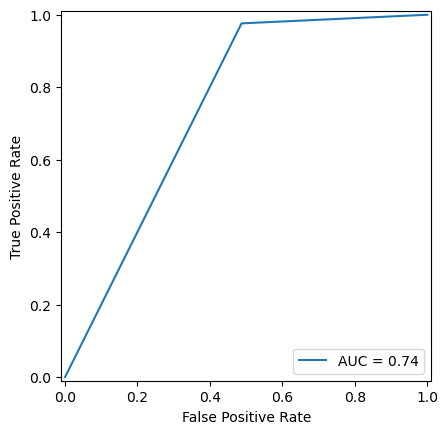

In [55]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

# knn

In [57]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1,20)),"p":[1,2]}

from sklearn.model_selection import GridSearchCV

cv_classifier = GridSearchCV(estimator, param_grid, cv=5,scoring = "accuracy")
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 14, 'p': 1}

In [58]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train,y_train)
from sklearn.metrics import accuracy_score

ypred_knn = knn.predict(x_train)

print("train accuracy" , accuracy_score(y_train,ypred_train))
ypred_test = knn.predict(x_test)
print("train accuracy" , accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(knn,x_train,y_train,cv=5).mean())

train accuracy 0.8044806517311609
train accuracy 0.8044806517311609
cv 0.7148216862502577


# svm

In [60]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

ypred_svm = model.predict(x_train)

from sklearn.metrics import accuracy_score
print("train",accuracy_score(ypred_svm,y_train))

train 0.6883910386965377


In [61]:
from sklearn.model_selection import GridSearchCV
estimator = SVC()
param_grid = {"C" : [0.01,0.1,1,10,100],"kernel":["linear","rbf","sigmoid","poly"]}

grid = GridSearchCV(estimator, param_grid,cv=5)

grid.fit(x_train,y_train)

grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [62]:
svm_model = grid.best_estimator_
svm_model.fit(x_train,y_train)

ypred_train = svm_model.predict(x_train)
print("train",accuracy_score(y_train,ypred_train))

print("cv",cross_val_score(svm_model,x_train,y_train,cv=5,scoring="accuracy").mean())

ypred_test==svm_model.predict(x_test)


print("test",accuracy_score(y_test,ypred_test))




train 0.8044806517311609
cv 0.804493918779633
test 0.7560975609756098


# Decision trees

In [64]:
model = DecisionTreeClassifier(random_state = True)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=True)

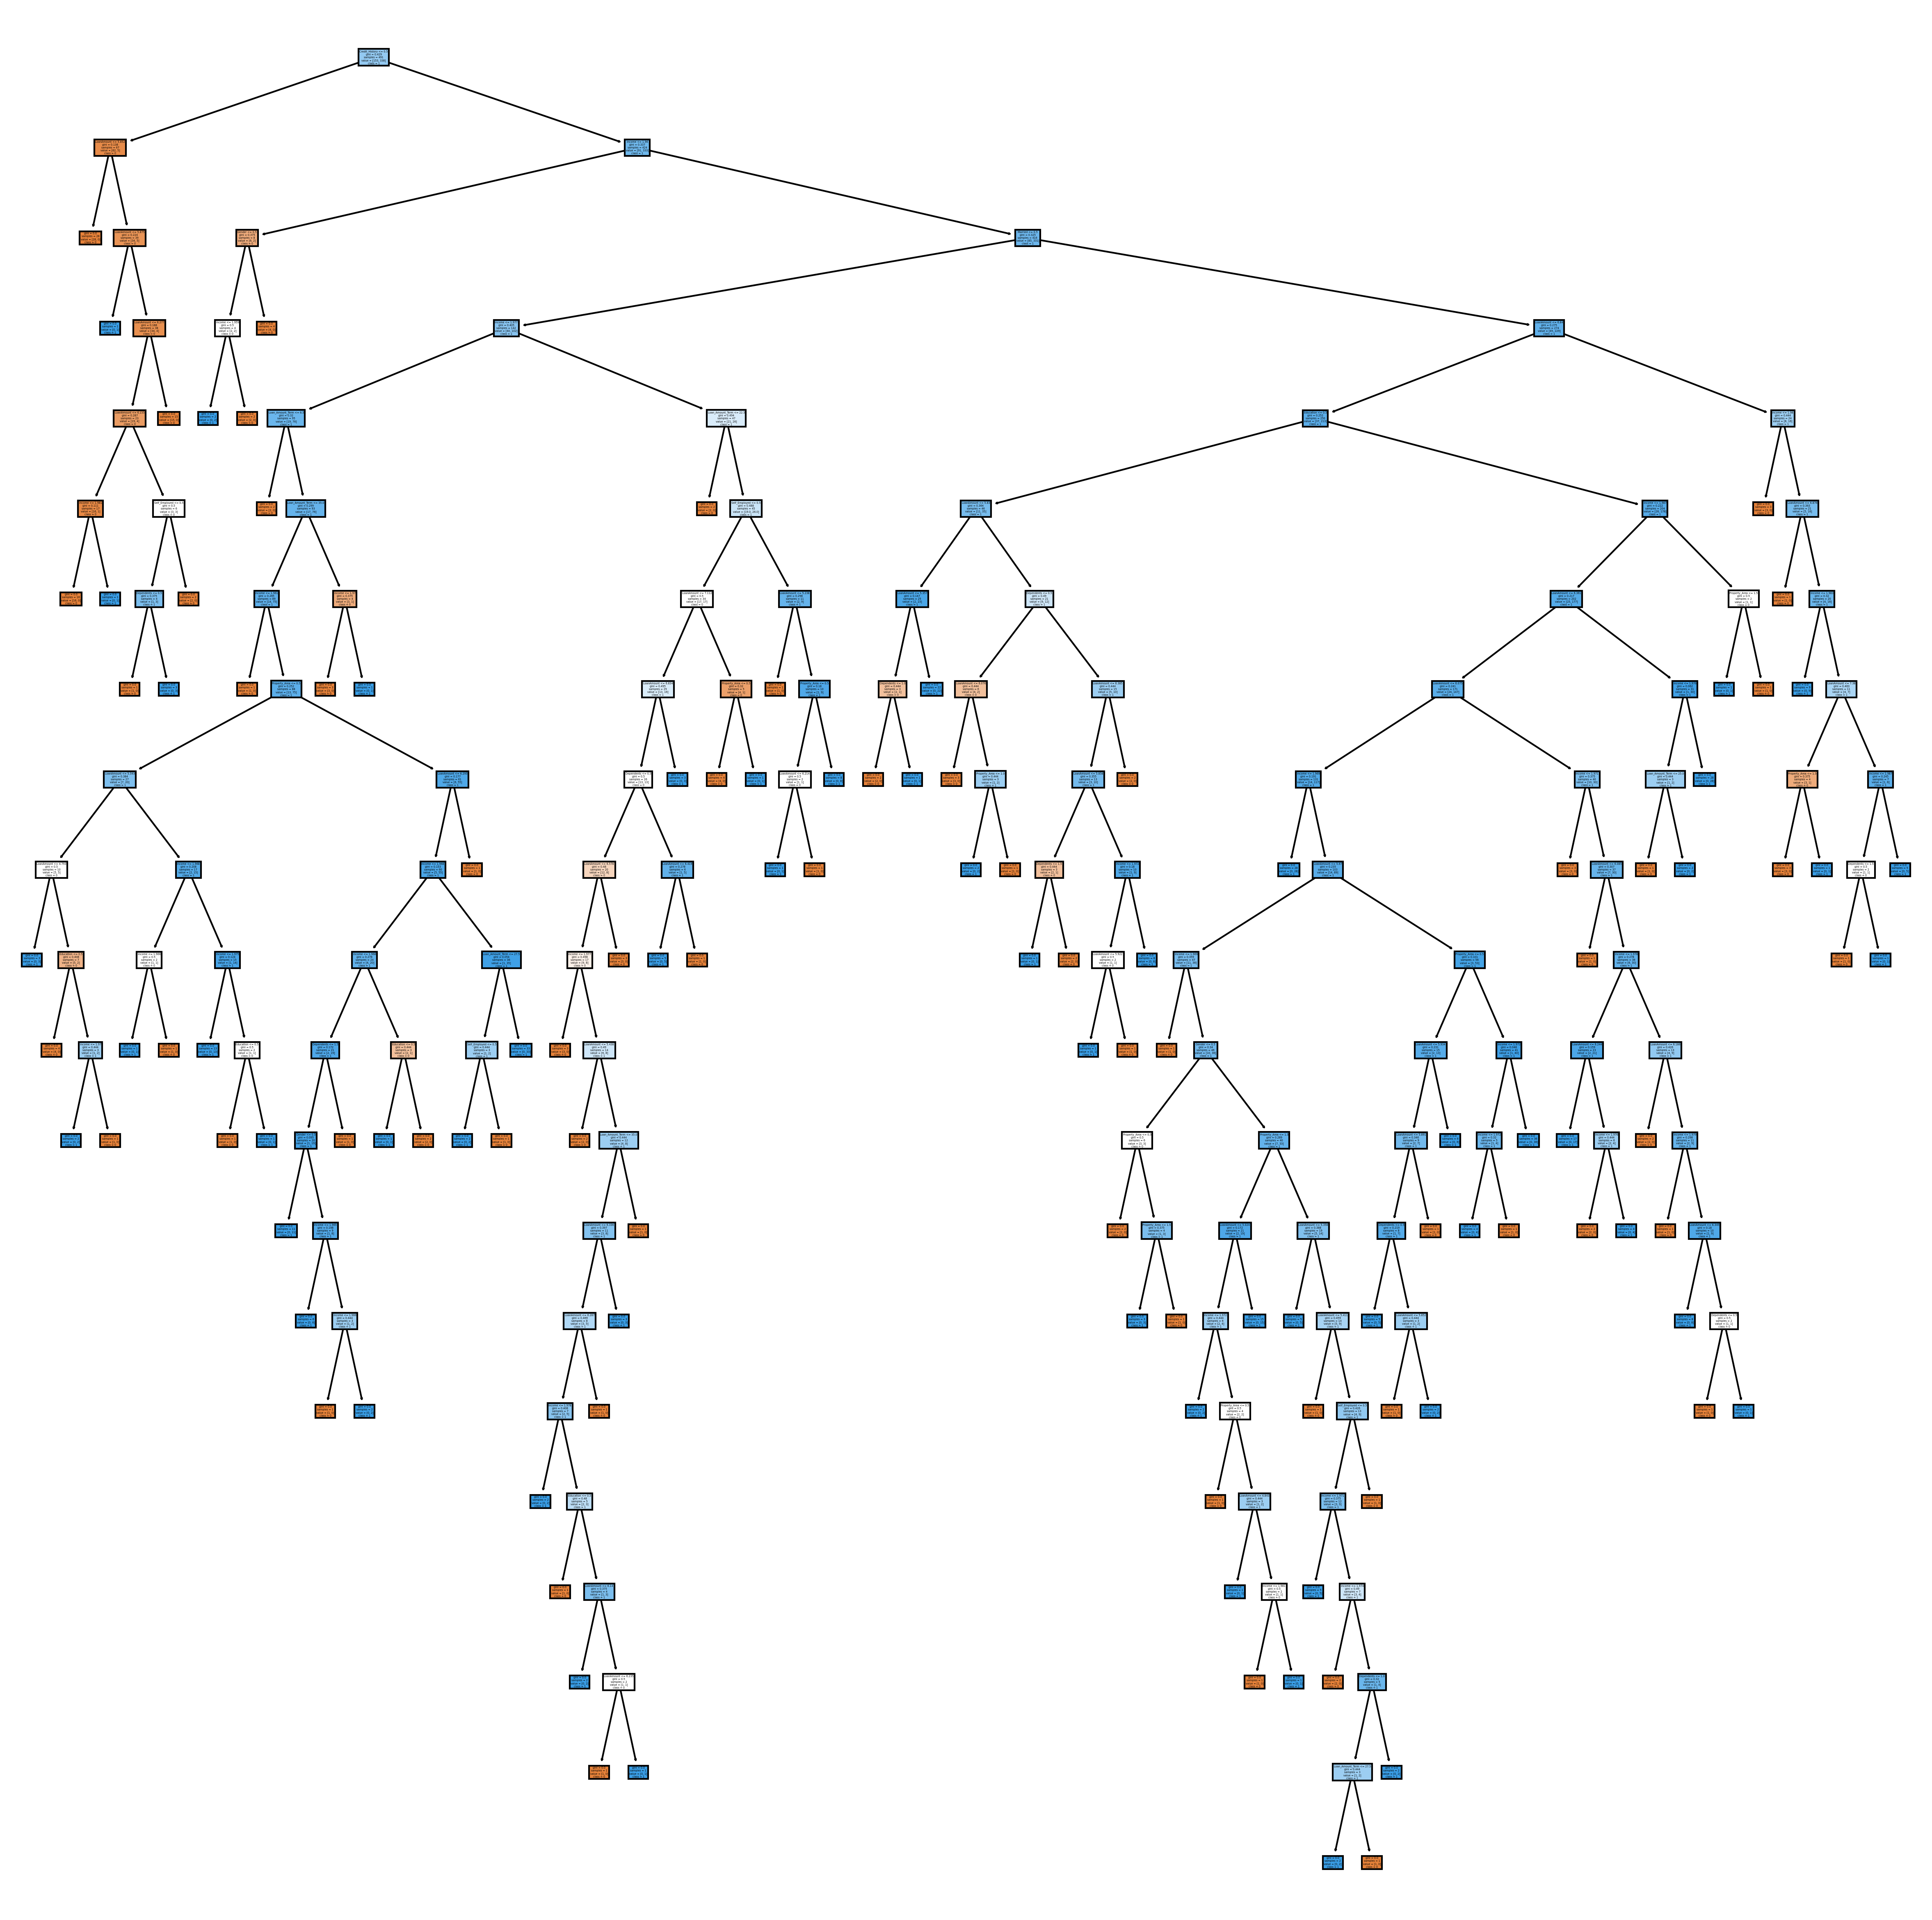

In [65]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
          feature_names=x_train.columns.tolist(),
          class_names= ["0","1"])

plt.show()

In [66]:
estimator = DecisionTreeClassifier(random_state=True)

param_grid = {"criterion":["gini","entropy"],
              "max_depth":list(range(1,16))}

dt_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(x_train,y_train)

dt = dt_grid.best_estimator_

dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [67]:
fests_ab= pd.DataFrame(dt.feature_importances_,
                        index=x.columns,
                        columns = ["importance"])



In [68]:
important_feature_dt = fests_ab[fests_ab["importance"]>0].index.tolist()

important_feature_dt

['Credit_History']

In [69]:
x_train_dt = x_train[important_feature_dt]
x_test_dt = x_test[important_feature_dt]

dt = dt_grid.best_estimator_
dt.fit(x_train_dt,y_train)

ypred_train = dt.predict(x_train_dt)
ypred_test = dt.predict(x_test_dt)


print("train",accuracy_score(y_train,ypred_train))
print("cv",cross_val_score(dt,x_train,y_train,cv=5,scoring="accuracy").mean())
print("test",accuracy_score(y_test,ypred_test))

train 0.8044806517311609
cv 0.804493918779633
test 0.8292682926829268


# Random forest classifier

In [71]:
estimator = RandomForestClassifier(random_state=True)

param_grid = {"n_estimators":list(range(1,51))}

rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(x_train,y_train)

rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=15, random_state=True)

In [72]:
feats_ab = pd.DataFrame(rf.feature_importances_,
                        index=x.columns,
                        columns=["importance"])

important_features_rf = feats_ab[feats_ab["importance"]>0].index.tolist()
x_train_rf = x_train[important_features_rf]
x_test_rf  = x_test[important_features_rf]


ypred_train = rf.predict(x_train_rf)
ypred_test  = rf.predict(x_test_rf)


print("train",accuracy_score(y_train,ypred_train))
print("cv",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())

print("test",accuracy_score(y_test,ypred_test))

train 0.9938900203665988
cv 0.7861265718408575
test 0.7804878048780488


# ADA boost

In [77]:
estimator = AdaBoostClassifier(random_state = True)
param_grid = {"n_estimators":list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

ab_grid.fit(x_train,y_train)

ab=ab_grid.best_estimator_
feats_ab = pd.DataFrame(ab.feature_importances_,
                        index=x.columns,
                        columns=["importance"])
important_features_ab = fests_ab[feats_ab["importance"]>0].index.tolist()
x_train_ab = x_train[important_features_ab]
x_test_ab = x_test[important_features_ab]

ab=ab_grid.best_estimator_
ab.fit(x_train_ab,y_train)

ypred_train= ab.predict(x_train_ab)
ypred_test = ab.predict(x_test_ab)

print("train",accuracy_score(y_train,ypred_train))
print("cv",cross_val_score(ab,x_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("test",accuracy_score(y_test,ypred_test))

train 0.8085539714867617
cv 0.8024531024531024
test 0.8292682926829268


# Gradient boost 

In [79]:
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,10)),
              "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1.0]}

gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(x_train,y_train)

gb = gb_grid.best_estimator_
feats_gb = pd.DataFrame(gb.feature_importances_,
                        index=x.columns,
                        columns=["importance"])
important_feature_gb = feats_gb[feats_gb["importance"]>0].index.tolist()


x_train_gb = x_train[important_feature_gb]
x_test_gb = x_test[important_feature_gb]

gb = gb_grid.best_estimator_
gb.fit(x_train_gb,y_train)

ypred_train  = gb.predict(x_train_gb)
ypred_test   = gb.predict(x_test_gb)


print("train",accuracy_score(y_train,ypred_train))
print("cv",cross_val_score(gb,x_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("test",accuracy_score(y_test,ypred_test))

train 0.8187372708757638
cv 0.8024531024531025
test 0.8292682926829268


# XG BOOST



estimator = XGBClassifier()

param_grid  =  {"n_estimators":[10,20,40,100],
                "max_depth":[3,4,5],
                "gamma":[0,0.15,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator,param_grid,scoring = "accuracy",cv=5)
xgb_grid.fit(x_train,y_train)

xgb = xgb_grid.best_estimator_


feats_xgb = pd.DataFrame(xgb.feature_importances_,
                        index=x.columns,
                        columns=["importance"])
important_feature_xgb = feats_xgb[feats_xgb["importance"]>0].index.tolist()

x_train_xgb = x_train[important_feature_xgb]
x_test_xgb = x_test[important_feature_xgb]


xgb.fit(x_train_xgb,y_train)

ypred_train  = xgb.predict(x_train_xgb)
ypred_test   = xgb.predict(x_test_xgb)


print("train",accuracy_score(y_train,ypred_train))
print("cv",cross_val_score(xgb,x_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("test",accuracy_score(y_test,ypred_test))

In [104]:
from joblib import dump
dump(gb,"loan.joblib")

['loan.joblib']

In [106]:
df.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'Income']

In [125]:
input_data = {
              'Gender':"Male",
              "Married":"No",
              "Dependents":1,
              "Education":"Graduate",
              "Self_Employed":"yes",
              "Income":10000,
              "LoanAmount":100,
              "Loan_Amount_Term":240,
              "Credit_History":"bad",
              "Property_Area":"Urban"}

In [137]:
df_predict = pd.DataFrame(input_data,index=[0])
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            1 non-null      object
 1   Married           1 non-null      object
 2   Dependents        1 non-null      int64 
 3   Education         1 non-null      object
 4   Self_Employed     1 non-null      object
 5   Income            1 non-null      int64 
 6   LoanAmount        1 non-null      int64 
 7   Loan_Amount_Term  1 non-null      int64 
 8   Credit_History    1 non-null      object
 9   Property_Area     1 non-null      object
dtypes: int64(4), object(6)
memory usage: 88.0+ bytes


In [145]:
 df["Dependents"] = df["Dependents"].fillna(0)

df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df["Gender"] = df["Gender"].replace({"Male":1,"Female":0})
df["Married"] = df["Married"].replace({"Yes":1,"No":0})
df["Education"] = df["Education"].replace({"Graduate":1,"Not Graduate":0})
df["Self_Employed"]=df["Self_Employed"].replace({"Yes":1,"No":0})
df["Property_Area"] = df["Property_Area"].replace({"Rural":0,"Semiurban":1,"Urban":2})
df["Credit_History"] = df["Credit_History"].replace({"good":1,"bad":0})
df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})


x_new = df_predict

In [160]:
x_new = x_new[important_feature_gb]



array([0], dtype=int64)

In [186]:
x_new

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,No,1,Graduate,yes,100,240,bad,Urban,10000


In [177]:
print(x_new["Married"].unique())


['No']


In [195]:
# Ensure all values are in the expected format
x_new["Gender"] = x_new["Gender"].replace({"Male": 1, "Female": 0})
x_new["Married"] = x_new["Married"].replace({"Yes": 1, "No": 0})
x_new["Education"] = x_new["Education"].replace({"Graduate": 1, "Not Graduate": 0})
x_new["Self_Employed"] = x_new["Self_Employed"].replace({"Yes": 1, "No": 0, "yes": 1, "no": 0})
x_new["Property_Area"] = x_new["Property_Area"].replace({"Rural": 0, "Semiurban": 1, "Urban": 2})
x_new["Credit_History"] = x_new["Credit_History"].replace({"good": 1, "bad": 0})

# Drop target if pres

In [197]:
gb.predict(x_new)

array([0], dtype=int64)